# 0.0.IMPORTS

## 0.1.HELPER FUNCTIONS

In [26]:
import math 
import pandas as pd
import inflection
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 0.2.LOADING DATA


In [5]:
df_sales_raw  = pd.read_csv ( 'data/train.csv', low_memory=False)
df_stores_raw = pd.read_csv ( 'data/store.csv', low_memory=False)

#MERGE DE DADOS
df_raw = pd.merge ( df_sales_raw, df_stores_raw, how= 'left', on= 'Store' )

In [6]:
df_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# 1.0 DESCRICAO DOS DADOS

## 1.1 RENAME COLUMNS

In [7]:
df1 = df_raw.copy()

In [8]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [9]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 
            'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 
            'Promo2', 'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore (x)

cols_new = list( map( snakecase, cols_old) )

#rename
df1.columns = cols_new

In [10]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## 1.2 DIMENSIONS

In [11]:
##shape 0 = linhas     1 = colunas

print('Number of Rows: {}'.format ( df1.shape[0] ) )
print('Number of Columns: {}'.format ( df1.shape[1] ) )


Number of Rows: 1017209
Number of Columns: 18


## 1.3 DATA TYPES

In [12]:
df1['date'] = pd.to_datetime( df1['date'] )
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4 CHECK NA

In [13]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 FILLOUT NA

In [14]:
df1 ['competition_distance'].max()

75860.0

In [15]:
#competition_distance    
df1['competition_distance'] = df1 ['competition_distance'].apply( lambda x: 20000.0 if math.isnan (x)  else x)

#competition_open_since_month  
df1['competition_open_since_month'] = df1.apply( lambda x: x ['date'].month if math.isnan( x['competition_open_since_month'] ) else x['competition_open_since_month'], axis = 1 )

#competition_open_since_year    
df1['competition_open_since_year'] = df1.apply( lambda x: x ['date'].year 
                                               if math.isnan( x['competition_open_since_year'] ) 
                                               else x['competition_open_since_year'], axis = 1 )

#promo2_since_week             

df1['promo2_since_week'] = df1.apply( lambda x: x ['date'].week 
                                     if math.isnan( x['promo2_since_week'] ) 
                                     else x['promo2_since_week'], axis = 1 )

#promo2_since_year           
df1['promo2_since_year'] = df1.apply( lambda x: x ['date'].year 
                                     if math.isnan( x['promo2_since_year'] ) 
                                     else x['promo2_since_year'], axis = 1 )

#promo_interval          
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

df1['promo_interval'].fillna(0,inplace =  True)

df1['month_map'] = df1['date'].dt.month.map( month_map )

#promo_interval - Se a promo está dentro do intervalo indicado
df1['is_promo'] = df1[['month_map', 'promo_interval']].apply( lambda x:  0 
                                                             if x['promo_interval'] == 0 
                                                             else 1 if x['month_map'] in x['promo_interval'].split (',') 
                                                             else 0, axis = 1)

## 1.6. CHANGE TYPES

In [16]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [17]:
#Mudar os tipos dos dados das colunas

df1['competition_open_since_month']  = df1['competition_open_since_month'].astype (int)
df1['competition_open_since_year']   = df1['competition_open_since_year'].astype (int)
df1['promo2_since_week']             = df1['promo2_since_week'].astype (int)
df1['promo2_since_year']             = df1['promo2_since_year'].astype (int)

## 1.7. DESCRIPTIVE STATISTICAL

In [18]:
#Separar variaveis numéricas e categórigas
num_attributes = df1.select_dtypes( include = ['int32', 'int64' , 'float64'] )
cat_attributes = df1.select_dtypes( exclude = ['int32', 'int64' , 'float64', 'datetime64[ns]'] )

In [19]:
#Central Tendency - mean, median

ct1 = pd.DataFrame( num_attributes.apply ( np.mean  ) ).T
ct2 = pd.DataFrame( num_attributes.apply ( np.median) ).T


#Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T


#Concatenate 
m = pd.concat( [d2,d3,d4,ct1,ct2,d1,d5,d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range','mean', 'median', 'std', 'skew', 'kurtosis']

In [20]:
m.head(9)

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,75860.0,75840.0,5467.928135,2330.0,7740.896804,2.894723,12.724442
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607


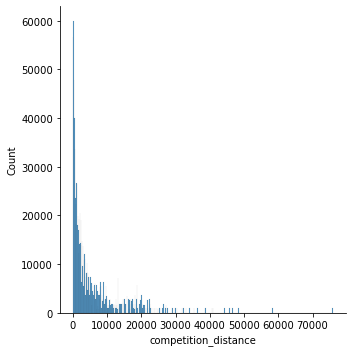

In [38]:
sns.displot(df1['competition_distance'])

In [45]:
cat_attributes.head()

,state_holiday,store_type,assortment,promo_interval,month_map
0,0,c,a,0,Jul
1,0,a,a,"Jan,Apr,Jul,Oct",Jul
2,0,a,a,"Jan,Apr,Jul,Oct",Jul
3,0,c,c,0,Jul
4,0,a,a,0,Jul


In [39]:
#variáveis categóricas sendo analisadas por boxplot.
cat_attributes.apply ( lambda x: x.unique().shape[0] )

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

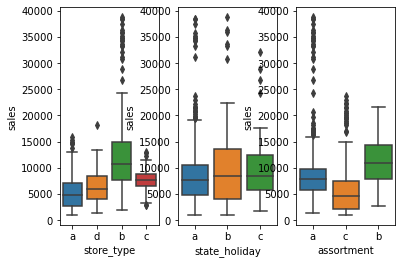

In [44]:
aux1 = df1 [ ( df1['state_holiday'] != '0' ) & ( df1['sales'] > 0 ) ] 

plt.subplot(1,3,1)
sns.boxplot( x= 'store_type', y= 'sales' , data= aux1 )

plt.subplot(1,3,2)
sns.boxplot( x= 'state_holiday', y= 'sales' , data= aux1 )

plt.subplot(1,3,3)
sns.boxplot( x= 'assortment', y= 'sales' , data= aux1 )

In [ ]:
df1.sample(5).T